In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix , classification_report

In [92]:
df = pd.read_csv('train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df.shape

(42000, 785)

In [94]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [95]:
df['label'].value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [96]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('label',axis=1),df['label'],test_size=0.2,random_state=42)

In [97]:
print(len(x_train))
print(len(x_test))

33600
8400


In [98]:
x_train.iloc[0]

,34941
pixel0,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
pixel5,0
pixel6,0
pixel7,0
pixel8,0
pixel9,0


In [99]:
x_train = x_train/255.0
x_test = x_test/255.0

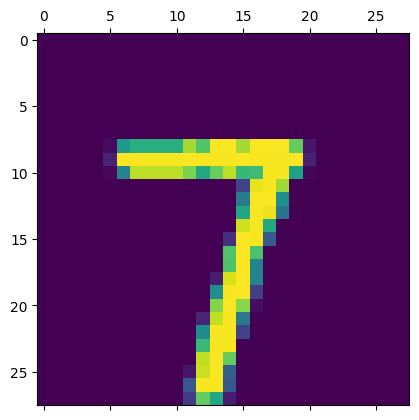

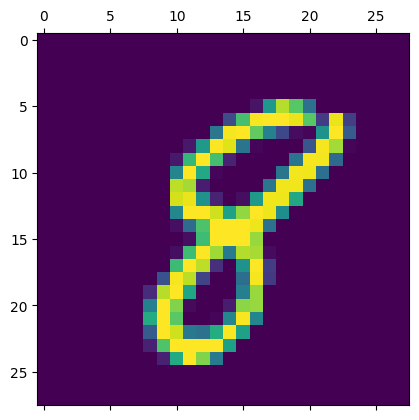

In [100]:
plt.matshow(x_train.iloc[4].values.reshape(28,28)) # Access row using iloc and reshape to image dimensions
plt.show()
plt.matshow(x_test.iloc[4].values.reshape(28,28)) # Access row using iloc and reshape to image dimensions
plt.show()

In [101]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

In [102]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [103]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
x=model.fit(x_train,y_train,epochs=10,batch_size=128,verbose=2,validation_split=0.1)

Epoch 1/10
237/237 - 2s - loss: 0.5696 - accuracy: 0.8382 - val_loss: 0.2729 - val_accuracy: 0.9301 - 2s/epoch - 7ms/step
Epoch 2/10
237/237 - 1s - loss: 0.2723 - accuracy: 0.9211 - val_loss: 0.2086 - val_accuracy: 0.9455 - 920ms/epoch - 4ms/step
Epoch 3/10
237/237 - 1s - loss: 0.2121 - accuracy: 0.9383 - val_loss: 0.1718 - val_accuracy: 0.9548 - 922ms/epoch - 4ms/step
Epoch 4/10
237/237 - 1s - loss: 0.1819 - accuracy: 0.9465 - val_loss: 0.1519 - val_accuracy: 0.9586 - 878ms/epoch - 4ms/step
Epoch 5/10
237/237 - 1s - loss: 0.1540 - accuracy: 0.9542 - val_loss: 0.1376 - val_accuracy: 0.9619 - 842ms/epoch - 4ms/step
Epoch 6/10
237/237 - 1s - loss: 0.1365 - accuracy: 0.9590 - val_loss: 0.1288 - val_accuracy: 0.9661 - 845ms/epoch - 4ms/step
Epoch 7/10
237/237 - 1s - loss: 0.1219 - accuracy: 0.9645 - val_loss: 0.1156 - val_accuracy: 0.9702 - 857ms/epoch - 4ms/step
Epoch 8/10
237/237 - 1s - loss: 0.1090 - accuracy: 0.9683 - val_loss: 0.1155 - val_accuracy: 0.9690 - 1s/epoch - 6ms/step
Epoch 

In [105]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=0)
print(f'Accuracy:{accuracy*100}')

Accuracy:96.79762125015259


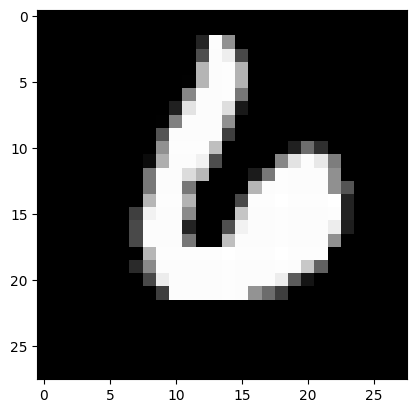

In [106]:
image=x_train[6]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

In [107]:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
p = model.predict([image])
print('Predicted: {}'.format(np.argmax(p)))


1/1 [==============================] - 0s 54ms/step
Predicted: 6
